In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel("data\kp-data.xlsx")
df.head()

,Year,Month,Day,Days since 01.01.1932 00:00,Days since 01.01.1932 12:00,BSR,days within BSR,Kp1,Kp2,Kp3,...,ap4,ap5,ap6,ap7,ap8,AP-mean,SN,F10.7obs,F10.7adj,D
0,2016,1,1,30681,30681.5,2488,19,6.000,5.333,5.000,...,18,6,4,7,6,28,37,98.4,95.1,2
1,2016,1,2,30682,30682.5,2488,20,3.000,2.333,3.000,...,9,9,6,6,5,9,40,100.0,96.6,2
2,2016,1,3,30683,30683.5,2488,21,0.333,1.667,2.000,...,3,5,9,6,12,6,51,101.9,98.5,2
3,2016,1,4,30684,30684.5,2488,22,0.333,1.667,1.667,...,3,3,7,6,3,4,70,95.3,92.2,2
4,2016,1,5,30685,30685.5,2488,23,0.333,1.000,1.000,...,6,4,7,9,7,5,35,95.2,92.1,2


In [7]:
df["D"].value_counts(normalize=True)

2    0.933357
1    0.064528
0    0.002116
Name: D, dtype: float64

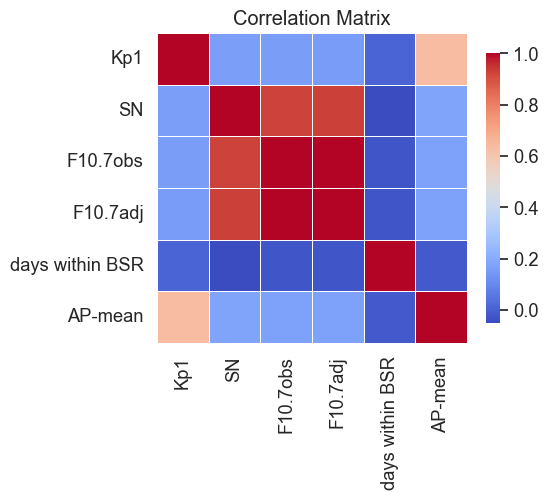

In [126]:
use_columns = ["Kp1", "SN", "F10.7obs", "F10.7adj", "days within BSR", "AP-mean"]
correlation_matrix = df[use_columns].corr()

plt.figure(figsize=(5, 5))

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.7},
)

plt.title("Correlation Matrix")
plt.show()

(array([868., 540., 691., 329., 221., 138.,  24.,  20.,   3.,   2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

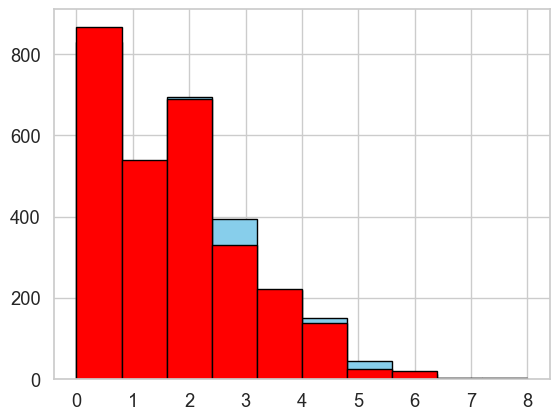

In [97]:
plt.hist(df["Kp1"], bins=10, color="skyblue", edgecolor="black")
plt.hist(df["Kp2"], bins=10, color="red", edgecolor="black")

In [112]:
temp = (df["Kp1"].round()).value_counts(normalize=True)
temp

1.0    0.279619
2.0    0.245063
0.0    0.186178
3.0    0.181946
4.0    0.076516
5.0    0.025035
6.0    0.004584
7.0    0.000705
8.0    0.000353
Name: Kp1, dtype: float64

In [125]:
rolled = df["Kp1"].round().rolling(3).mean()
rolled

0            NaN
1            NaN
2       3.000000
3       1.000000
4       0.000000
          ...   
2831    2.666667
2832    2.666667
2833    2.333333
2834    2.666667
2835    3.000000
Name: Kp1, Length: 2836, dtype: float64

In [133]:
df["Kp_Daily_Mean"] = df[[f"Kp{x}" for x in range(1, 9)]].sum(axis=1) / 8

In [134]:
df.tail()

,Year,Month,Day,Days since 01.01.1932 00:00,Days since 01.01.1932 12:00,BSR,days within BSR,Kp1,Kp2,Kp3,...,ap5,ap6,ap7,ap8,AP-mean,SN,F10.7obs,F10.7adj,D,Kp_Daily_Mean
2831,2023,10,2,33512,33512.5,2593,15,3.000,3.333,1.000,...,6,5,5,9,8,173,157.4,157.7,0,1.916500
2832,2023,10,3,33513,33513.5,2593,16,1.000,2.333,1.333,...,7,7,7,7,6,148,153.7,153.8,0,1.708250
2833,2023,10,4,33514,33514.5,2593,17,3.000,2.333,2.333,...,6,5,7,22,10,159,155.0,155.1,0,2.291625
2834,2023,10,5,33515,33515.5,2593,18,4.333,5.000,2.333,...,6,3,3,9,16,169,156.1,156.1,0,2.500000
2835,2023,10,6,33516,33516.5,2593,19,2.000,2.333,2.000,...,4,5,4,15,7,152,155.3,155.3,0,1.791625


# Dane od Antoniego


In [25]:
df_16 = pd.read_csv("./data/data_2016.csv")
df_16 = df_16.loc[:, ~df_16.columns.str.contains("^Unnamed")]
df_16.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,k_index_current,k_index_target
283678,2016-12-31 23:58:00,-3.60551,-5.31124,-3.16447,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.667,3
283679,2016-12-31 23:59:00,-4.61841,-4.52630,-3.05202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.667,3


In [26]:
df_16["more_data_flag"] = df_16.iloc[:, 4:53].apply(
    lambda x: True if sum(x) != 0 else False, axis=1
)

In [28]:
df_16["more_data_flag"].value_counts(normalize=True)

True     0.934278
False    0.065722
Name: more_data_flag, dtype: float64

In [72]:
def draw_corr_matrix_plot(
    df: pd.DataFrame,
    annot: bool = False,
    use_cols=None,
    save=False,
    a: int = 5,
    title: str = None,
) -> None:
    if use_cols is not None:
        correlation_matrix = df[use_cols].corr()
    else:
        correlation_matrix = df.corr()

    plt.figure(figsize=(a, a))

    sns.set(font_scale=1.2)
    sns.set_style("whitegrid")

    sns.heatmap(
        correlation_matrix,
        annot=annot,
        cmap="coolwarm",
        linewidths=0.5,
        square=True,
        cbar_kws={"shrink": 0.7},
    )
    if title is not None:
        plt.title(title)
    if save:
        plt.savefig("corr.jpg")
    plt.show()

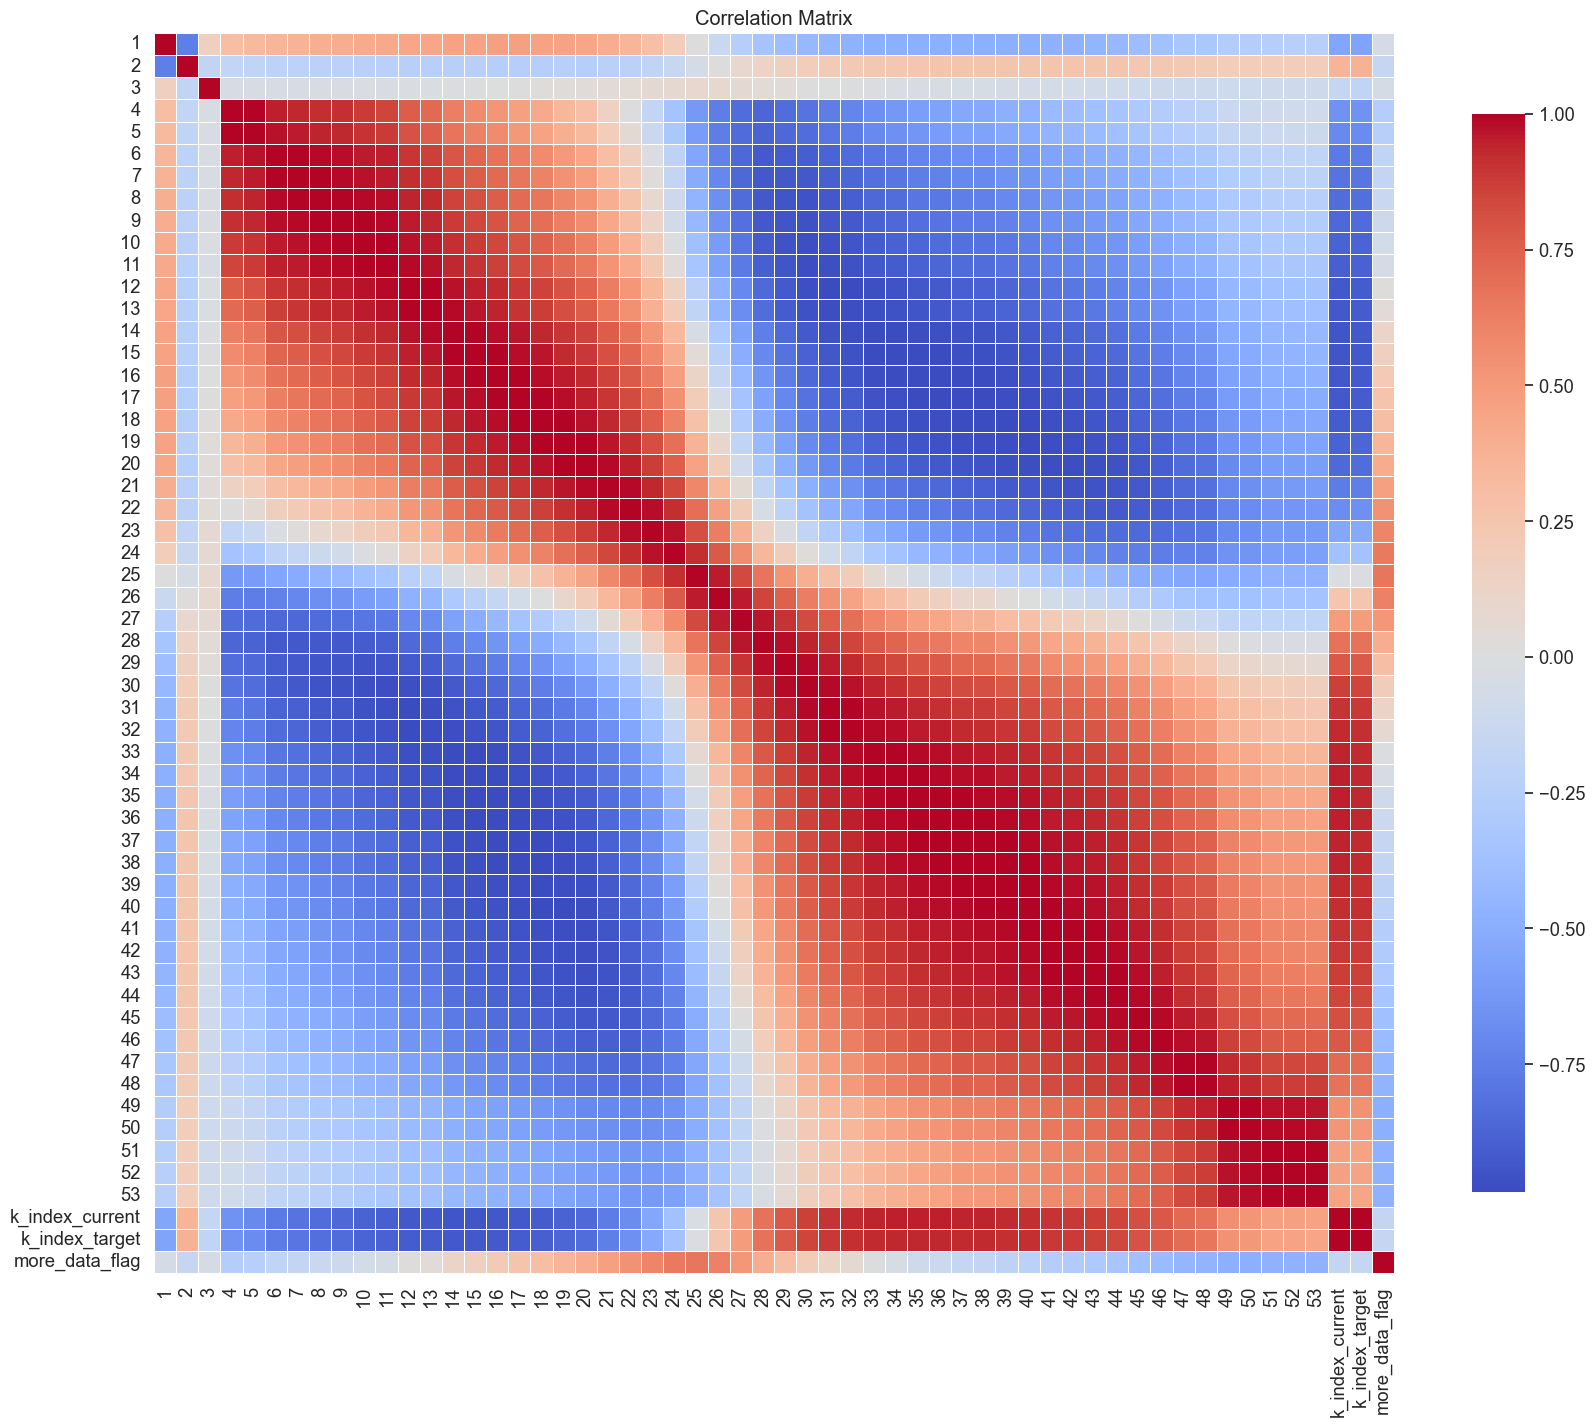

In [51]:
draw_corr_matrix_plot(corr_16, save=True)

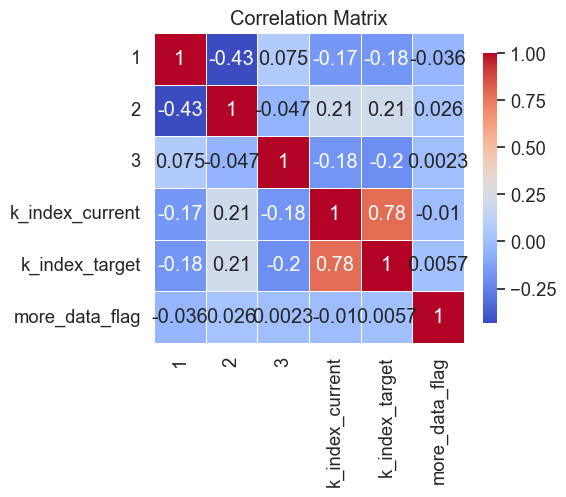

In [56]:
draw_corr_matrix_plot(
    df_16,
    use_cols=["1", "2", "3", "k_index_current", "k_index_target", "more_data_flag"],
    annot=True,
    save=True,
)

In [68]:
def merge_csv_data():
    data_frames = []
    for year in range(2016, 2024):
        df = pd.read_csv(f"./data/data_{year}.csv")
        df["more_data_flag"] = df.iloc[:, 4:53].apply(
            lambda x: True if sum(x) != 0 else False, axis=1
        )
        data_frames.append(df)
    df_merged = pd.concat(data_frames)
    return df_merged


df_merged = merge_csv_data()
df_merged.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8652\4204812950.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


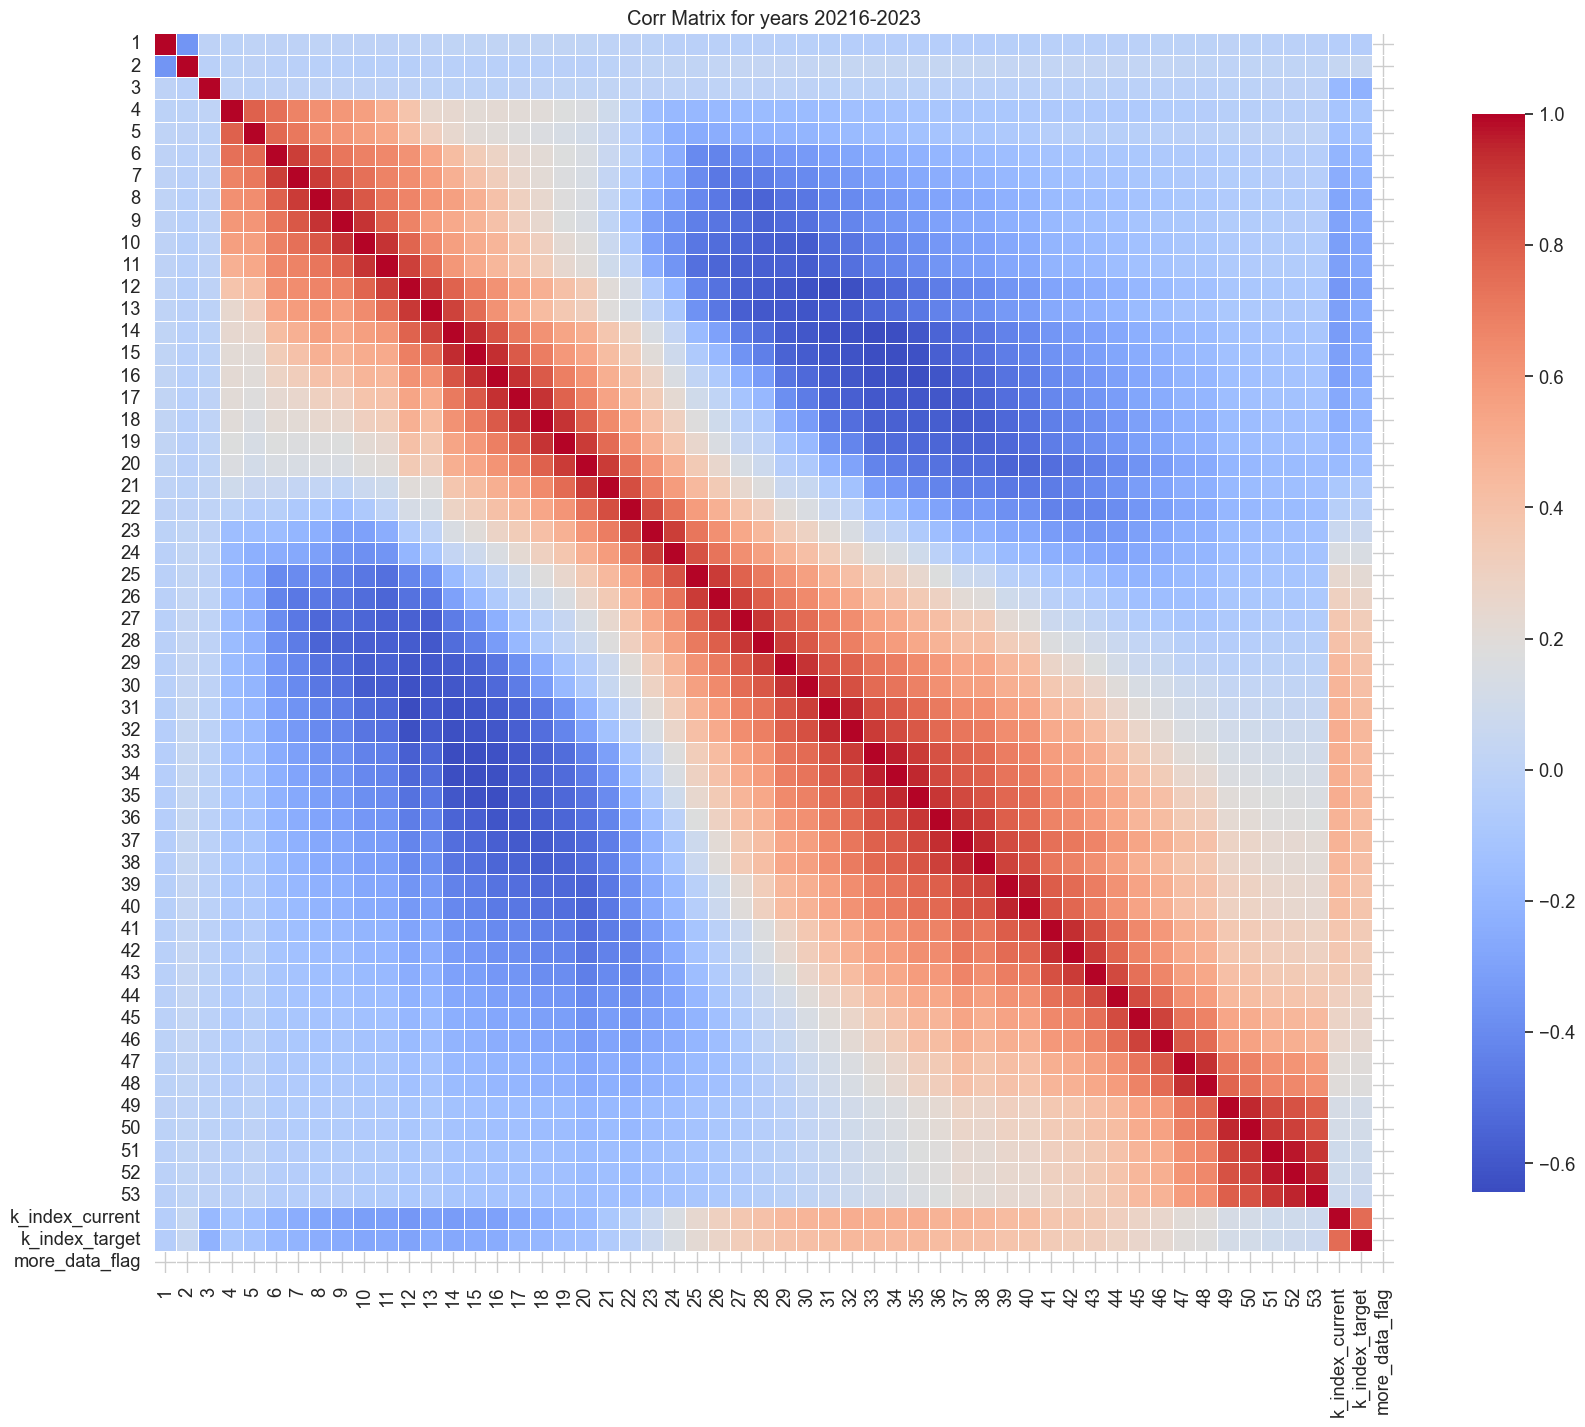

In [73]:
draw_corr_matrix_plot(
    df=df_merged, save=True, a=20, title="Corr Matrix for years 20216-2023"
)

Do zrobienia

- Jak wartości wektora $(x, y, z)$ korelują z odpalaniem pomiarów dla innych kolumn i jak korelują z Kp.

Wnioski

- 93% pomiarów jest potwierdzonych przez wielu naukowców.
- Obrót słońca w okół własnej osi trwa 27 dni.
- `SN` (liczba plam na słońcu) jest silnie skorelowane z `F10.7obs` (zmierzony solar flux).
- `days within BSR` nie wpływa na `F10.7obs`
